In [1]:
import pandas as pd

In [17]:
df1 = pd.read_csv("data - table1.csv", parse_dates=[1])
df2 = pd.read_csv("data - table2.csv", parse_dates=[1, 2])

Перед тобой две таблицы данных.
table1 - таблица с историческими данными по клиенту. В ней есть три поля:
id  - айди клиента
date - дата записи
qty - некоторое число, физический смысл которого не важен

table2 - таблица-фильтр. В ней есть три поля:
id  - айди клиента
date_start - дата начала исследуемого периода
date_end - дата конца исследуемого периода

Задание
Необходимо написать код с помощью pandas, который создаст третью таблицу table_filtered, в которой по каждому id клиента оставлены только те строки из table1, дата которых, находится в диапазоне [date_start; date_end] из table2. Т.е. таблица, которая будет содержать подвыборку строк из таблицы table1.

In [ ]:
df1 = pd.read_csv("data - table1.csv", parse_dates=[1])
df2 = pd.read_csv("data - table2.csv", parse_dates=[1, 2])

In [35]:
df1 = pd.read_csv("data - table1.csv", parse_dates=[1])
df2 = pd.read_csv("data - table2.csv", parse_dates=[1, 2])
table_filtered = pd.merge(df1, df2, how='left', on="id")
table_filtered = table_filtered.loc[(table_filtered.date >= table_filtered.date_start) & (table_filtered.date <= table_filtered.date_end)][["id", "date", "qty"]]
table_filtered.reset_index(inplace=True, drop=True)
table_filtered

,id,date,qty
0,1,2022-10-12,0.314512
1,1,2022-10-13,-0.011784
2,1,2022-10-14,0.780512
3,1,2022-10-15,-0.018605
4,1,2022-10-16,0.341738
...,...,...,...
203,4,2022-11-22,0.481018
204,4,2022-11-23,0.802485
205,4,2022-11-24,-0.235498
206,4,2022-11-25,1.415409


В таблице table_filtered из предыдущего задания сравнить распределения значений в столбце qty клиента id=1 с остальными клиентами и найти id “ближайшего” и “дальнего” клиента с точки зрения распределения значений в поле qty. Критерий “близости” определи самостотельно.

<AxesSubplot:ylabel='Density'>

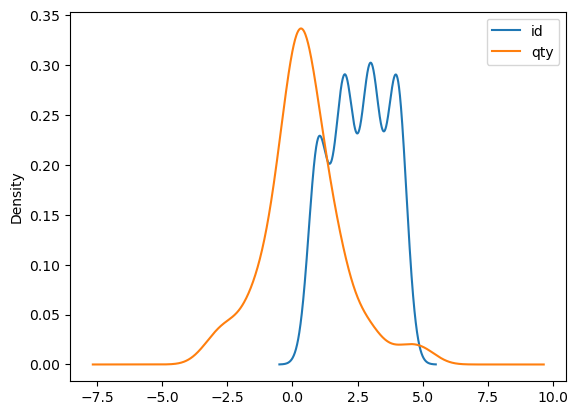

In [39]:
table_filtered[["id", "qty"]].plot(kind="kde")

In [54]:
import matplotlib.pyplot as plt
import numpy as np

def standardize(sample):
    """Standardize the data"""
    mean = sample.mean()
    std = sample.std()
    sample_z = (sample - mean)/std
    return sample_z 


In [68]:
import scipy
import numpy as np
s1 = np.array(table_filtered[table_filtered["id"] == 1]["qty"])
s2 = np.array(table_filtered[table_filtered["id"] == 2]["qty"])
s3 = np.array(table_filtered[table_filtered["id"] == 3]["qty"])
s4 = np.array(table_filtered[table_filtered["id"] == 4]["qty"])

print(scipy.stats.wasserstein_distance(s1, s2))
print(scipy.stats.wasserstein_distance(s1, s3))
print(scipy.stats.wasserstein_distance(s1, s4))

s1n = (s1 - s1.mean())/s1.std()
s2n = (s2 - s2.mean())/s2.std()
s3n = (s3 - s3.mean())/s3.std()
s4n = (s4 - s4.mean())/s4.std()

print(scipy.stats.ks_2samp(s1n, s2n))
print(scipy.stats.ks_2samp(s1n, s3n))
print(scipy.stats.ks_2samp(s1n, s4n))

KstestResult(statistic=0.14685615848406547, pvalue=0.6110901593497998, statistic_location=-0.41683076546474535, statistic_sign=-1)
KstestResult(statistic=0.12624584717607973, pvalue=0.7731200217029702, statistic_location=-0.3353415358028695, statistic_sign=-1)
KstestResult(statistic=0.13826638477801267, pvalue=0.6802673267250688, statistic_location=0.9866254392367096, statistic_sign=1)


In [71]:
print(scipy.stats.ks_2samp(s1, s2))
print(scipy.stats.ks_2samp(s1, s3))
print(scipy.stats.ks_2samp(s1, s4))

KstestResult(statistic=0.31912144702842377, pvalue=0.01075469882762722, statistic_location=1.001527863, statistic_sign=1)
KstestResult(statistic=0.38205980066445183, pvalue=0.0010349623272903456, statistic_location=1.1821655, statistic_sign=1)
KstestResult(statistic=0.39365750528541227, pvalue=0.0007186885943274705, statistic_location=0.3729580173, statistic_sign=1)


In [73]:
print(scipy.stats.wasserstein_distance(s1, s2))
print(scipy.stats.wasserstein_distance(s1, s3))
print(scipy.stats.wasserstein_distance(s1, s4))

0.9135345013651774
1.14532510513874
0.5335618707567781


In [70]:
sum(s2)

16.293427473610002

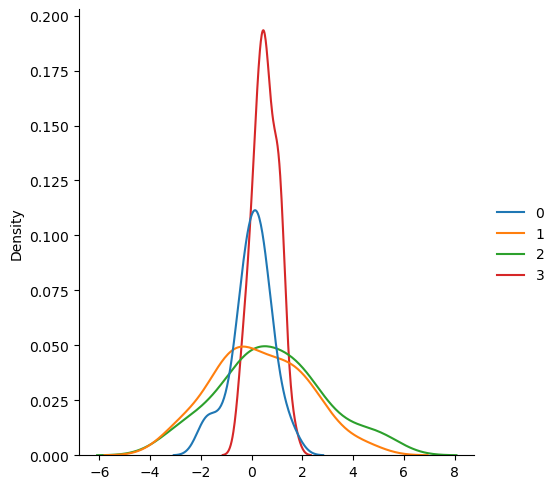

In [64]:
import seaborn as sns
sns.displot([s1,s2,s3,s4], kind="kde")
plt.show();

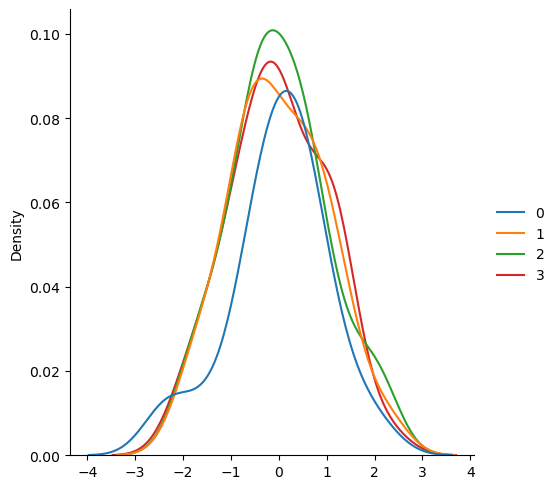

In [66]:
import seaborn as sns
sns.displot([s1n,s2n,s3n,s4n], kind="kde")
plt.show();

<AxesSubplot:ylabel='Count'>

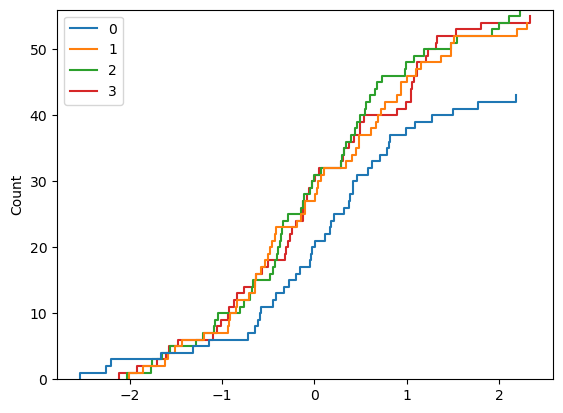

In [67]:
sns.ecdfplot([s1n,s2n,s3n,s4n], stat="count")

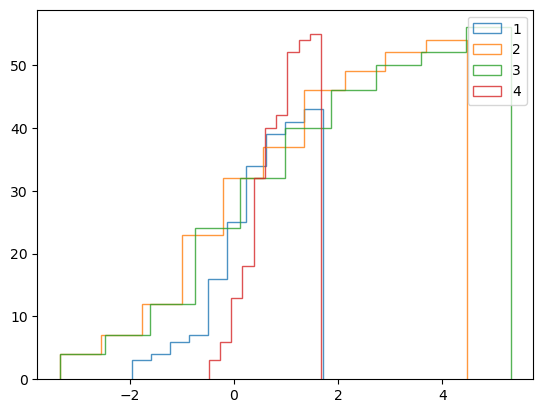

In [52]:
plt.hist(table_filtered[table_filtered["id"] == 1]["qty"], cumulative=True, label=1,
         histtype='step', alpha=0.8)
plt.hist(table_filtered[table_filtered["id"] == 2]["qty"], cumulative=True, label=2,
         histtype='step', alpha=0.8)
plt.hist(table_filtered[table_filtered["id"] == 3]["qty"], cumulative=True, label=3,
         histtype='step', alpha=0.8)
plt.hist(table_filtered[table_filtered["id"] == 4]["qty"], cumulative=True, label=4,
         histtype='step', alpha=0.8)
plt.legend()

In [ ]:
import scipy
